In [1]:
from pyspark.sql import SparkSession
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
spark = SparkSession.builder \
    .appName("Outbreak-Visualization") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.0") \
    .getOrCreate()

24/05/08 21:07:53 WARN Utils: Your hostname, Mohits-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.5 instead (on interface en0)
24/05/08 21:07:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/mohitsaigutha/.ivy2/cache
The jars for the packages stored in: /Users/mohitsaigutha/.ivy2/jars
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-186ff079-c992-402a-b5ab-173498eb6582;1.0
	confs: [default]


:: loading settings :: url = jar:file:/Users/mohitsaigutha/Library/Python/3.9/lib/python/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found org.apache.spark#spark-sql-kafka-0-10_2.12;3.3.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.3.0 in central
	found org.apache.kafka#kafka-clients;2.8.1 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found org.slf4j#slf4j-api;1.7.32 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.2 in central
	found org.spark-project.spark#unused;1.0.0 in central
	found org.apache.hadoop#hadoop-client-api;3.3.2 in central
	found commons-logging#commons-logging;1.1.3 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.apache.commons#commons-pool2;2.11.1 in central
:: resolution report :: resolve 221ms :: artifacts dl 5ms
	:: modules in use:
	com.google.code.findbugs#jsr305;3.0.0 from central in [default]
	commons-logging#commons-logging;1.1.3 from central in [default]
	org.apache.commons#commons-pool2;2.11.1 from central in [default]
	org.apache.hadoop#hadoop-client-a

24/05/08 21:08:08 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [9]:
df = spark.read.csv("1m_health_events_dataset.csv", header=True, inferSchema=True)
df.show(5)

+--------------------+-------------------+--------+--------+--------------------+----------+
|           EventType|          Timestamp|Location|Severity|             Details|Is_Anomaly|
+--------------------+-------------------+--------+--------+--------------------+----------+
|  emergency_incident|2022-01-01 00:00:00|  Boston|    high|This is a simulat...|         0|
|      health_mention|2022-01-01 00:01:00|   Tokyo|     low|This is a simulat...|         0|
|      health_mention|2022-01-01 00:01:00|   Tokyo|  medium|This is a simulat...|         0|
|         vaccination|2022-01-01 00:01:00|  Boston|  medium|This is a simulat...|         0|
|general_health_re...|2022-01-01 00:03:00|   Tokyo|  medium|This is a simulat...|         0|
+--------------------+-------------------+--------+--------+--------------------+----------+
only showing top 5 rows



In [6]:
from pyspark.sql.functions import to_date, window, date_format
import matplotlib.dates as mdates

In [5]:
df = df.withColumn("Date", to_date("Timestamp"))
df=df.withColumn("Month", date_format("Date", "MMM-yy"))

In [6]:
df = df.withColumn("SortColumn", date_format("Date", "yyyy-MM"))

In [10]:
event_monthly_counts = df.groupBy("EventType", "Month", "SortColumn").count()
event_monthly_counts = event_monthly_counts.orderBy("SortColumn")
event_monthly_counts = event_monthly_counts.drop("SortColumn")
event_monthly_counts_pdf = event_monthly_counts.toPandas()

In [8]:
import matplotlib as mpl

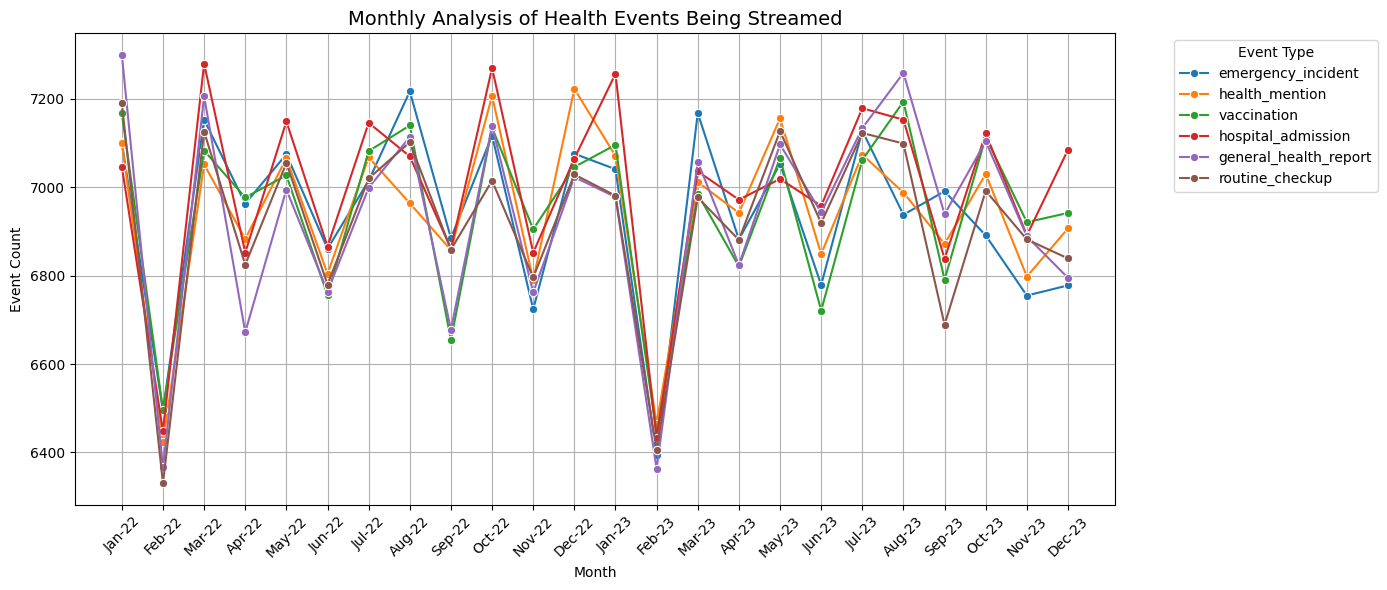

In [17]:
health_related_types = ['emergency_incident', 'health_mention', 'vaccination', 'hospital_admission', 'general_health_report', 'routine_checkup']
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(14, 6))
for event_type in health_related_types:
    data = event_monthly_counts_pdf[event_monthly_counts_pdf['EventType'] == event_type]
    sns.lineplot(data=data, x='Month', y='count', marker='o', label=event_type)

plt.title('Monthly Analysis of Health Events Being Streamed', fontsize=14)  
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
location_event_counts = df.groupBy("Location", "EventType", "Month", "SortColumn").count()
location_event_counts = location_event_counts.orderBy("SortColumn")
location_event_counts_pdf = location_event_counts.toPandas()


CodeCache: size=131072Kb used=29799Kb max_used=29803Kb free=101272Kb
 bounds [0x00000001091e0000, 0x000000010af30000, 0x00000001111e0000]
 total_blobs=11611 nmethods=10626 adapters=897
 compilation: disabled (not enough contiguous free space left)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


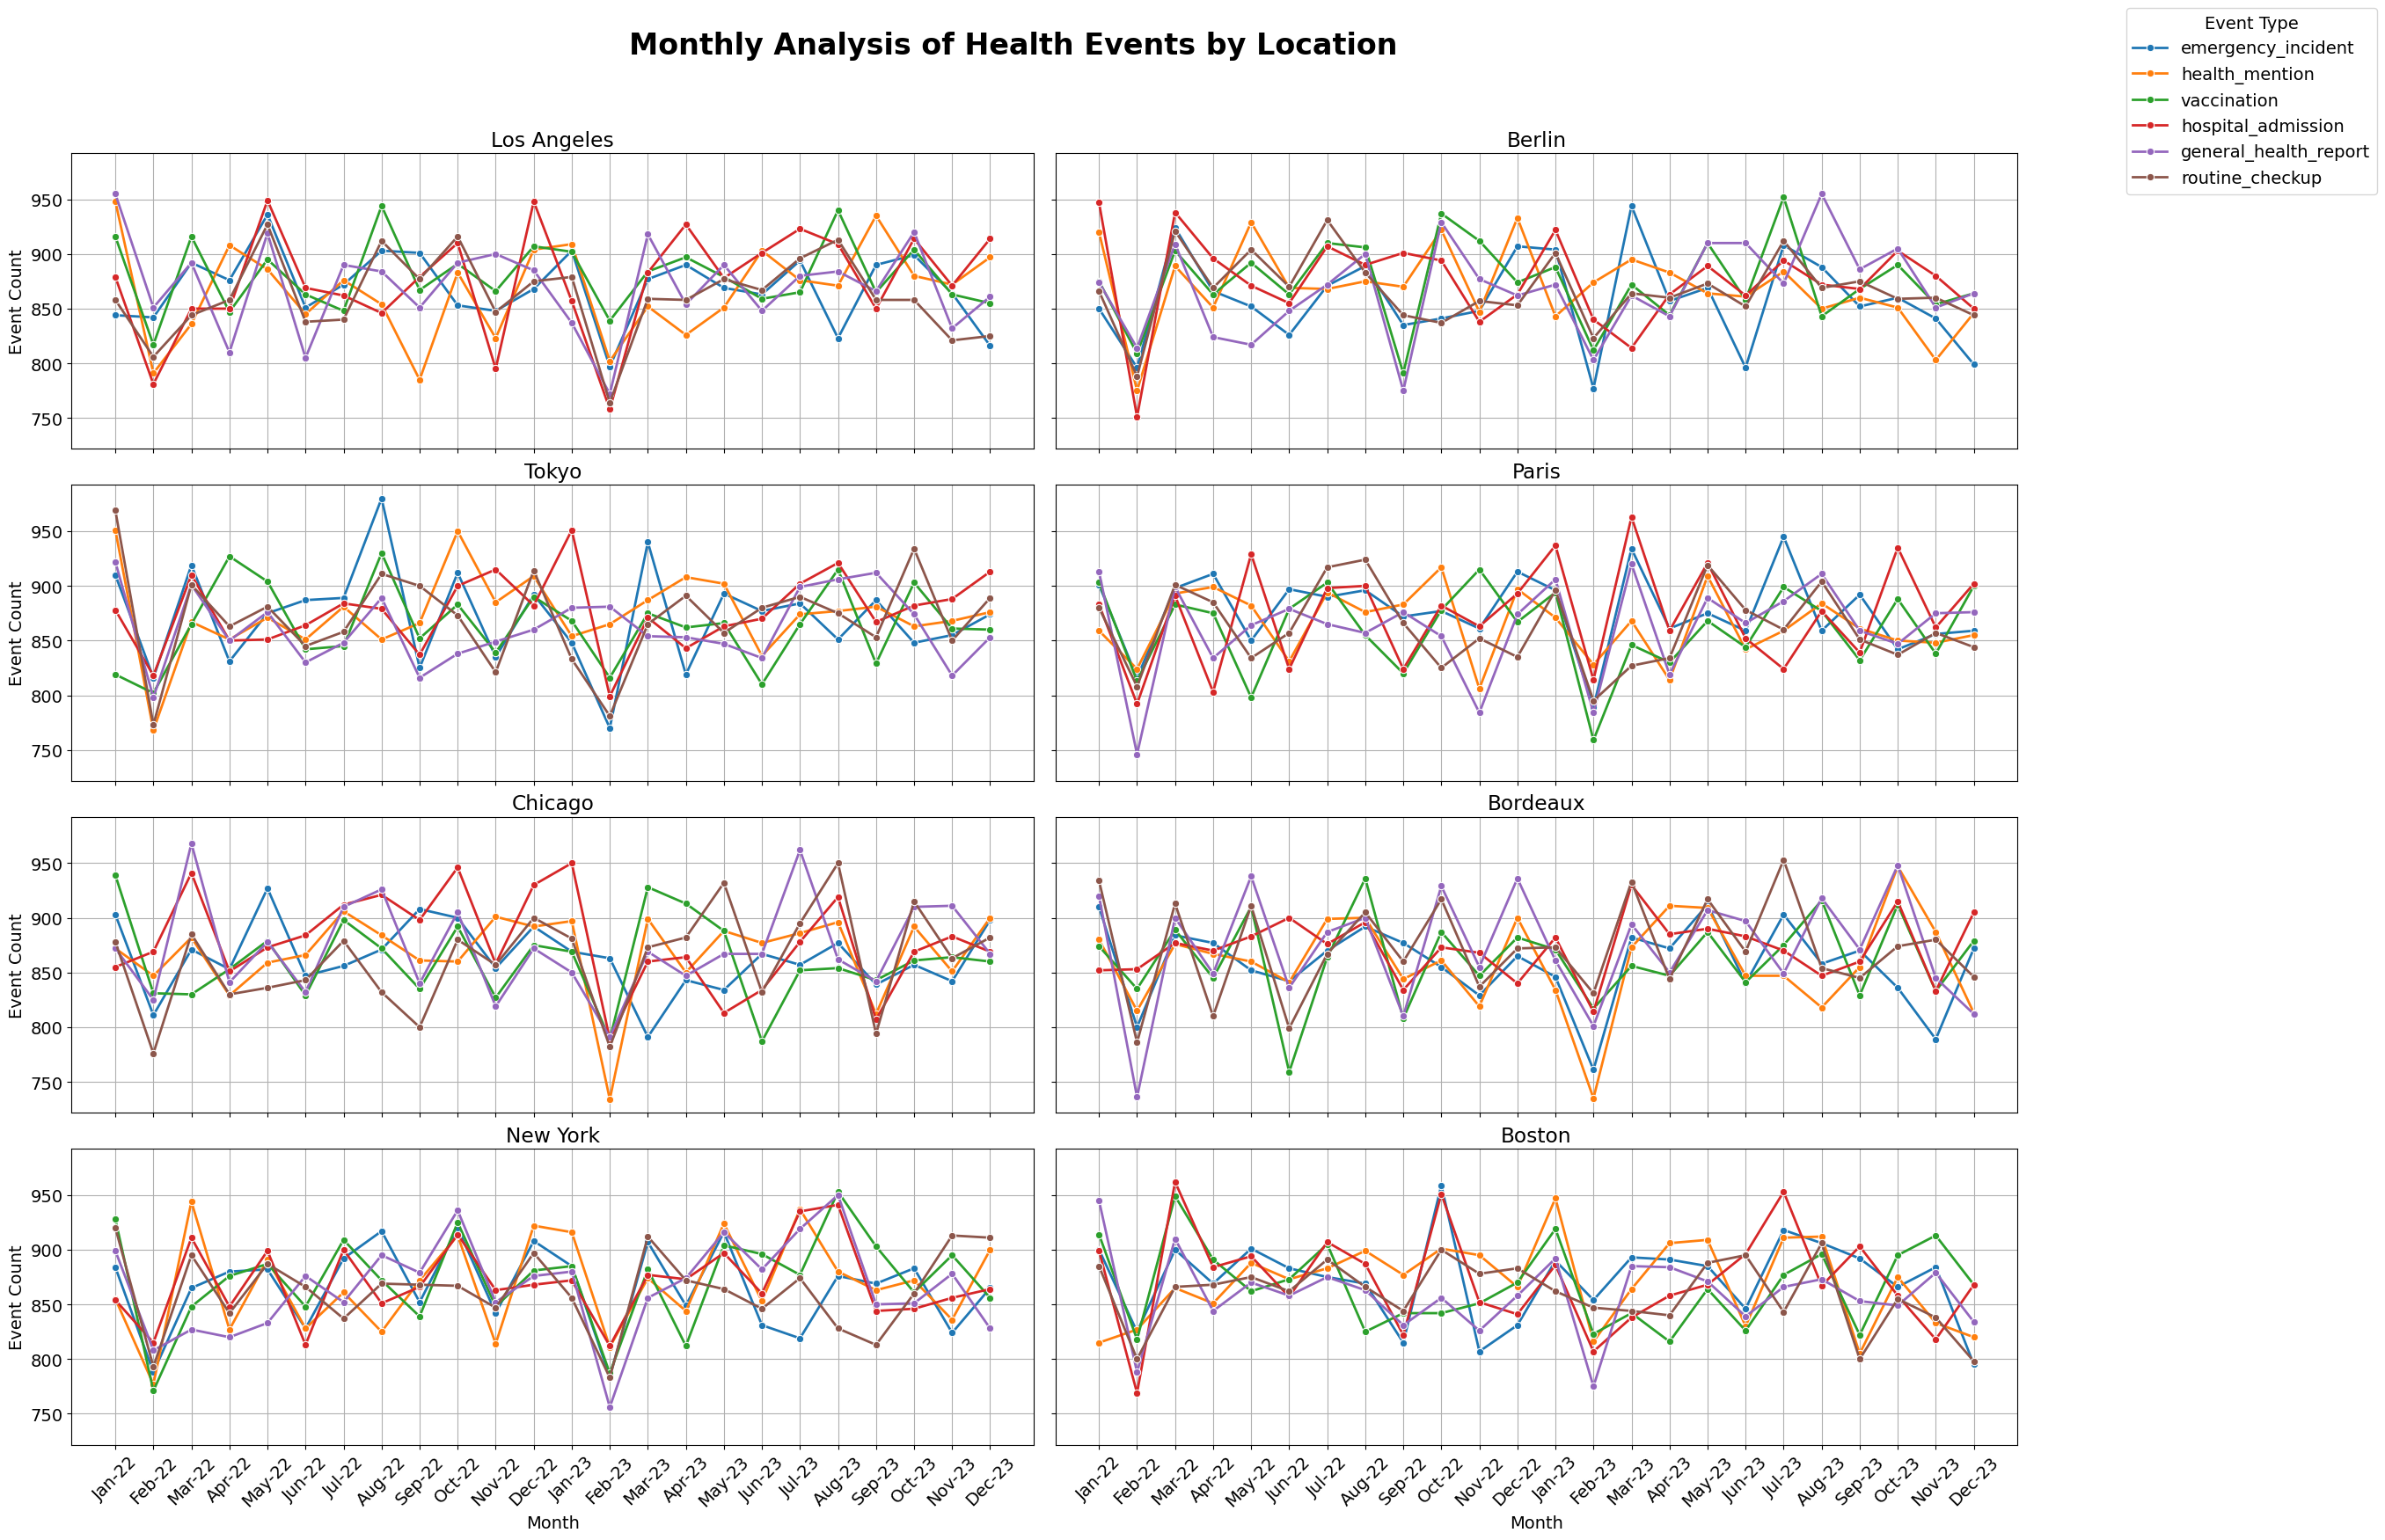

In [19]:
mpl.rcParams.update({'font.size': 14})  pes
locations = ['Los Angeles', 'Berlin', 'Tokyo', 'Paris', 'Chicago', 'Bordeaux', 'New York', 'Boston']
health_related_types = ['emergency_incident', 'health_mention', 'vaccination', 
                        'hospital_admission', 'general_health_report', 'routine_checkup']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(24, 18), sharex=True, sharey=True)


axes = axes.flatten()


for ax, location in zip(axes, locations):
    location_data = location_event_counts_pdf[location_event_counts_pdf['Location'] == location]
    
  
    for event_type in health_related_types:
        event_data = location_data[location_data['EventType'] == event_type]
        sns.lineplot(ax=ax, data=event_data, x='Month', y='count', marker='o', label=event_type, linewidth=2)
    
    ax.set_title(location)  
    ax.set_xlabel('Month')
    ax.set_ylabel('Event Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


plt.tight_layout(pad=3.0, h_pad=0.5, w_pad=1.0, rect=[0, 0, 1, 0.95])


plt.suptitle('Monthly Analysis of Health Events by Location', fontsize=24, fontweight='bold', va='top')


for ax in axes:
    ax.get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1), title='Event Type')


plt.show()


/var/folders/by/09yq779n2m9blnsyh3krs3jw0000gn/T/ipykernel_76665/2787031105.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(outbreak_counts))


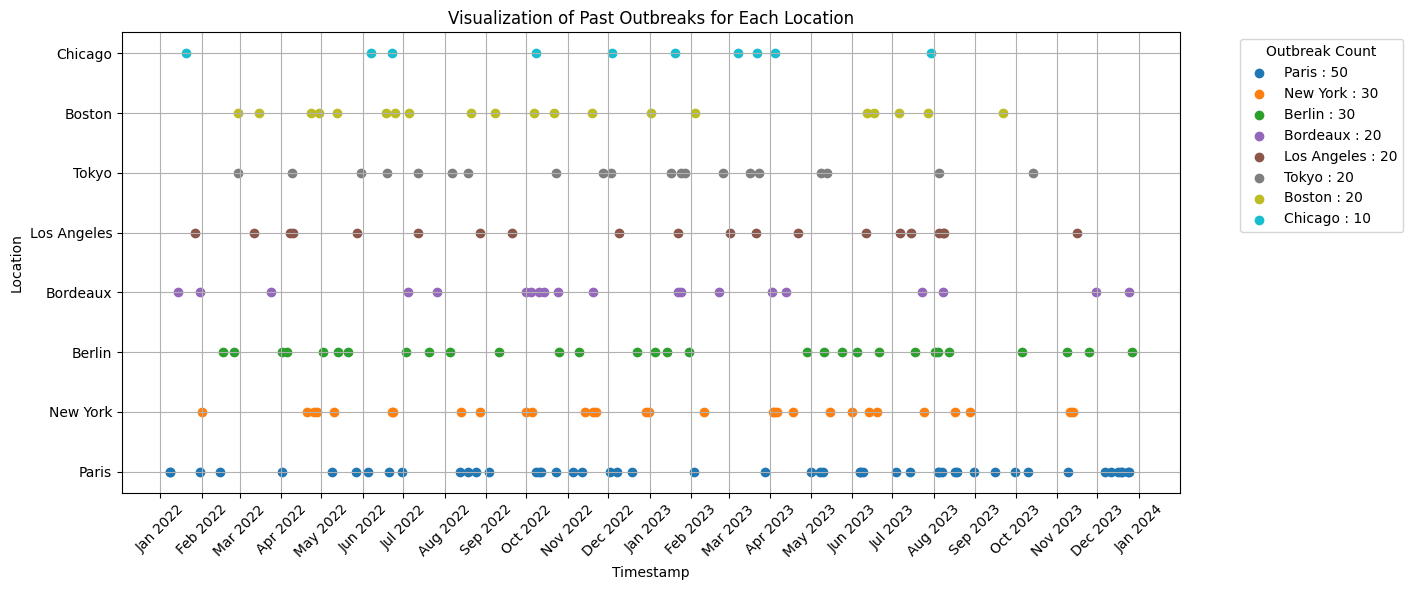

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


outbreak_df = df.filter(df.Is_Anomaly == 1)

pandas_df = outbreak_df.toPandas()

pandas_df['Timestamp'] = pd.to_datetime(pandas_df['Timestamp'])


outbreak_counts = pandas_df['Location'].value_counts().to_dict()

colors = plt.cm.get_cmap('tab10', len(outbreak_counts))


plt.figure(figsize=(12, 6))
for i, location in enumerate(outbreak_counts.keys()):
    location_data = pandas_df[pandas_df['Location'] == location]
    plt.scatter(location_data['Timestamp'], location_data['Location'], color=colors(i), label=f'{location} : {outbreak_counts[location]}')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Visualization of Past Outbreaks for Each Location')
plt.xlabel('Timestamp')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.legend(title='Outbreak Count', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [37]:
monthly_outbreak_counts = outbreak_df.groupBy( "Month", "SortColumn").count()
monthly_outbreak_counts = monthly_outbreak_counts.orderBy("SortColumn")
monthly_outbreak_counts_df = monthly_outbreak_counts.toPandas()
monthly_outbreak_counts_df.head()



,Month,SortColumn,count
0,Jan-22,2022-01,8
1,Feb-22,2022-02,5
2,Mar-22,2022-03,3
3,Apr-22,2022-04,11
4,May-22,2022-05,9


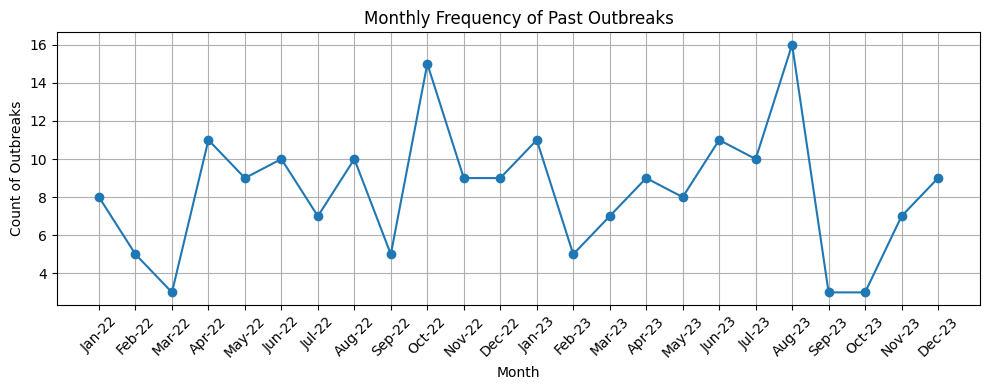

In [40]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_outbreak_counts_df['Month'], monthly_outbreak_counts_df['count'], marker='o', linestyle='-')
plt.title('Monthly Frequency of Past Outbreaks')
plt.xlabel('Month')
plt.ylabel('Count of Outbreaks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Other graphs

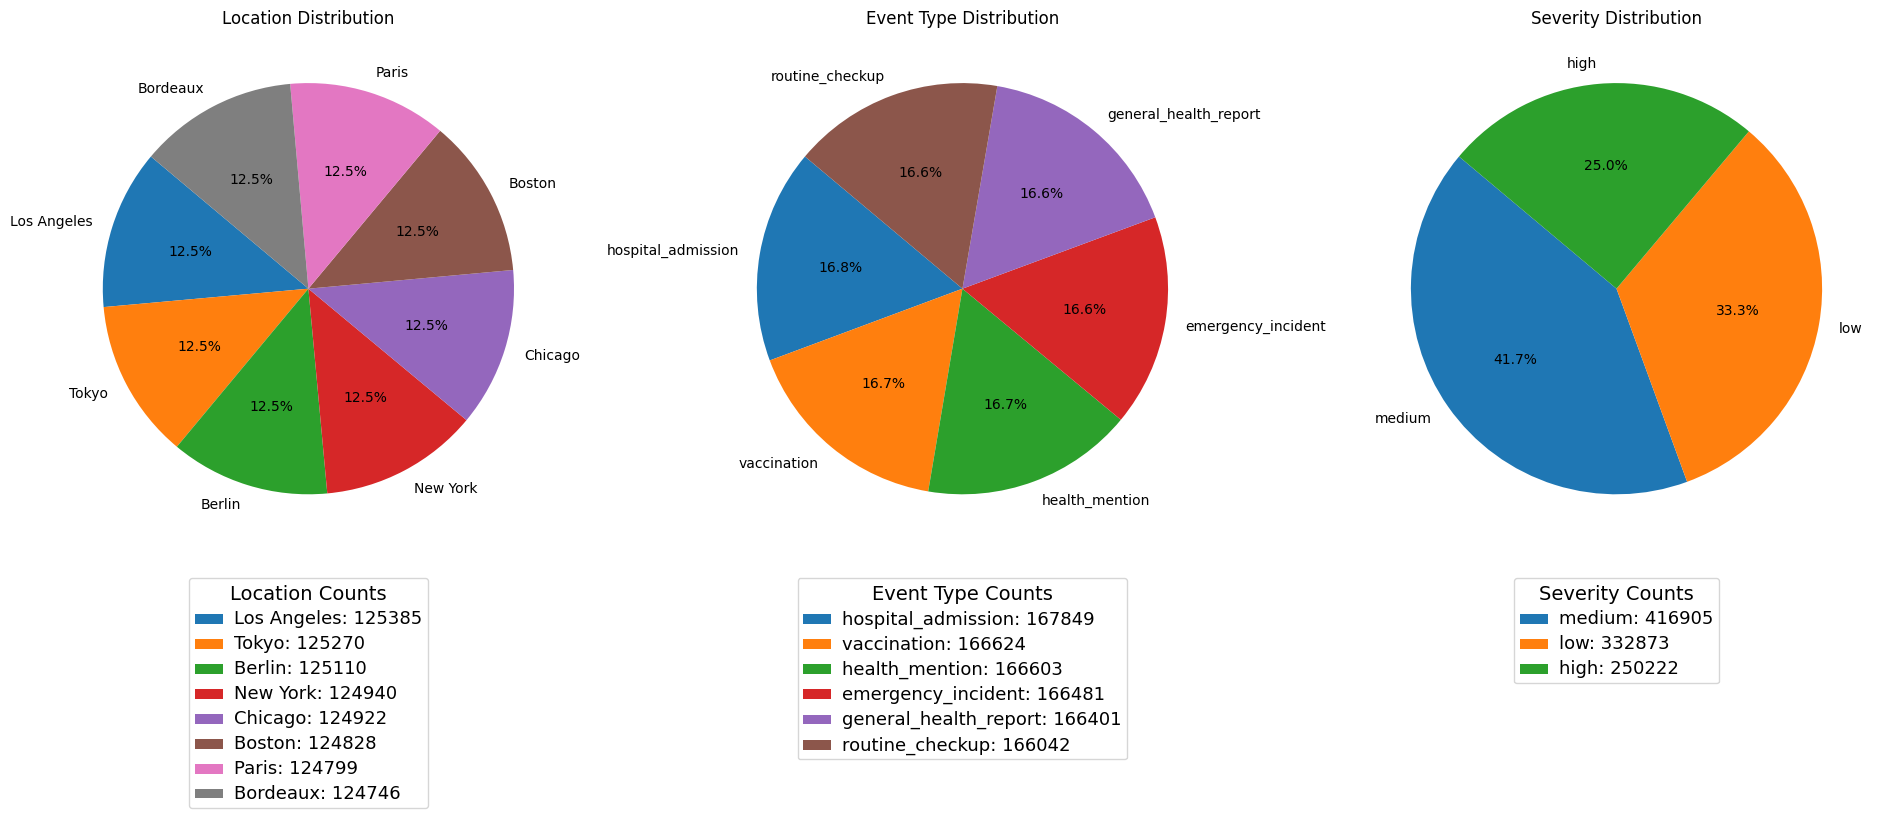

In [12]:
loc_counts = pdf['Location'].value_counts()
event_counts = pdf['EventType'].value_counts()
severity_counts = pdf['Severity'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(19, 8))  

axes[0].pie(loc_counts, labels=loc_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Location Distribution')
legend = axes[0].legend([f'{label}: {count}' for label, count in loc_counts.items()],
                        title="Location Counts", loc="upper center", bbox_to_anchor=(0.5, -0.05))
legend.get_title().set_fontsize('14')  
for text in legend.get_texts():
    text.set_fontsize('13')  

axes[1].pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Event Type Distribution')
legend = axes[1].legend([f'{label}: {count}' for label, count in event_counts.items()],
                        title="Event Type Counts", loc="upper center", bbox_to_anchor=(0.5, -0.05))
legend.get_title().set_fontsize('14')  
for text in legend.get_texts():
    text.set_fontsize('13')  


axes[2].pie(severity_counts, labels=severity_counts.index, autopct='%2.1f%%', startangle=140)
axes[2].set_title('Severity Distribution')
legend = axes[2].legend([f'{label}: {count}' for label, count in severity_counts.items()],
                        title="Severity Counts", loc="upper center", bbox_to_anchor=(0.5, -0.05))
legend.get_title().set_fontsize('14')
for text in legend.get_texts():
    text.set_fontsize('13')  

plt.tight_layout()
plt.show()


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=25005Kb max_used=25005Kb free=106066Kb
 bounds [0x00000001089e0000, 0x000000010a280000, 0x00000001109e0000]
 total_blobs=9916 nmethods=8987 adapters=841
 compilation: disabled (not enough contiguous free space left)


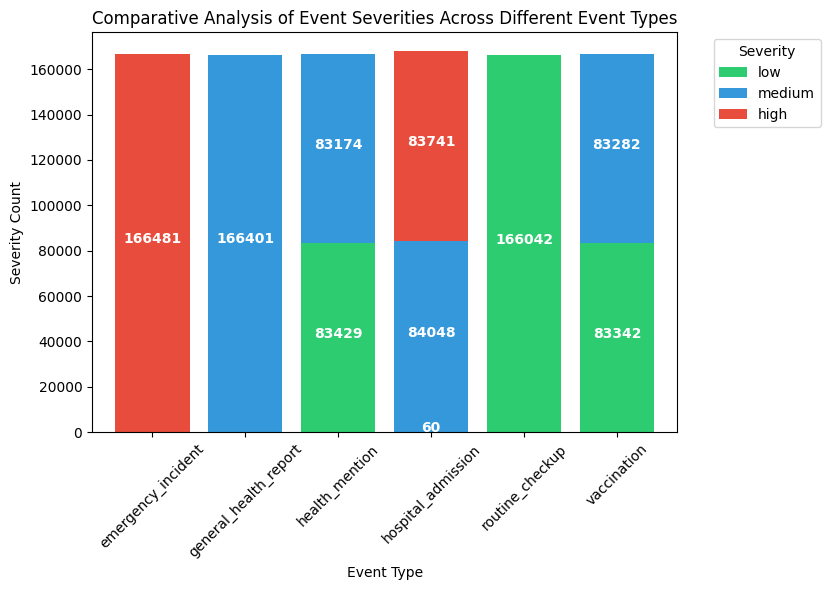

In [8]:
pdf = df.toPandas()
agg_data = pdf.groupby(['EventType', 'Severity']).size().unstack(fill_value=0)

agg_data = agg_data[['low', 'medium', 'high']]

colors = ['#2ecc71','#3498db', '#e74c3c']  

agg_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, width=0.8)
plt.title('Comparative Analysis of Event Severities Across Different Event Types')
plt.xlabel('Event Type')
plt.ylabel('Severity Count')
plt.xticks(rotation=45)

plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (index, row) in enumerate(agg_data.iterrows()):
    cum_height = 0
    for col, color in zip(agg_data.columns, colors):
        value = row[col]
        if value > 0:  
            plt.text(i, cum_height + value/2, int(value), ha='center', color='white', weight='bold')
        cum_height += value

plt.tight_layout(rect=[0,0,0.85,1])  
plt.show()

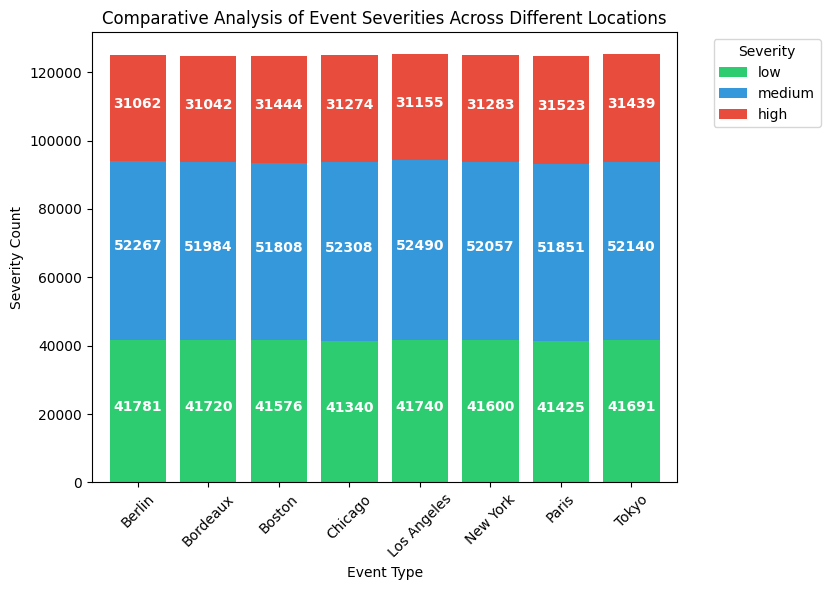

In [13]:
agg_data1 = pdf.groupby(['Location', 'Severity']).size().unstack(fill_value=0)

agg_data1 = agg_data1[['low', 'medium', 'high']]

colors = ['#2ecc71','#3498db', '#e74c3c']  

agg_data1.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, width=0.8)
plt.title('Comparative Analysis of Event Severities Across Different Locations')
plt.xlabel('Event Type')
plt.ylabel('Severity Count')
plt.xticks(rotation=45)

plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (index, row) in enumerate(agg_data1.iterrows()):
    cum_height = 0
    for col, color in zip(agg_data1.columns, colors):
        value = row[col]
        if value > 0:  
            plt.text(i, cum_height + value/2, int(value), ha='center', color='white', weight='bold')
        cum_height += value

plt.tight_layout(rect=[0,0,0.85,1])  
plt.show()



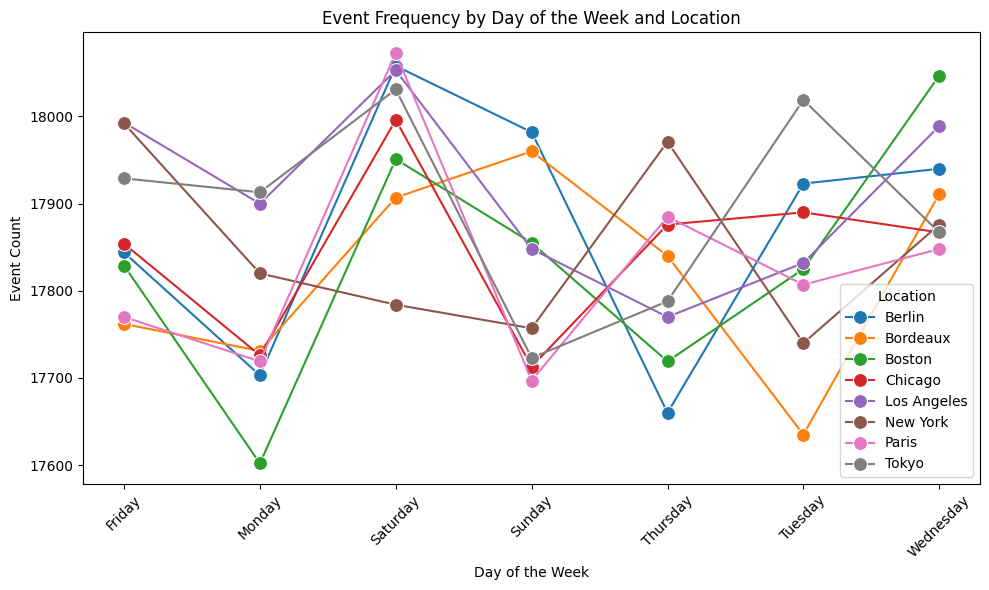

In [11]:
pdf['DayOfWeek'] = pdf['Timestamp'].dt.day_name()
location_counts = pdf.groupby(['DayOfWeek', 'Location']).size().reset_index(name='EventCount')

plt.figure(figsize=(10, 6))
sns.lineplot(data=location_counts, x='DayOfWeek', y='EventCount', hue='Location', marker='o', markersize=10)
plt.title('Event Frequency by Day of the Week and Location')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [10]:
future_data = spark.read.csv("../health_data_predictions.csv", header=True, inferSchema=True)
future_data.show(5)

+--------------------+-----------+--------+----------+
|           EventType|   Location|Severity|Is_Anomaly|
+--------------------+-----------+--------+----------+
|general_health_re...|      Paris|  medium|       0.0|
|      health_mention|      Paris|  medium|       0.0|
|  hospital_admission|Los Angeles|    high|       0.0|
|         vaccination|     London|     low|       0.0|
|         vaccination|     London|  medium|       0.0|
+--------------------+-----------+--------+----------+
only showing top 5 rows



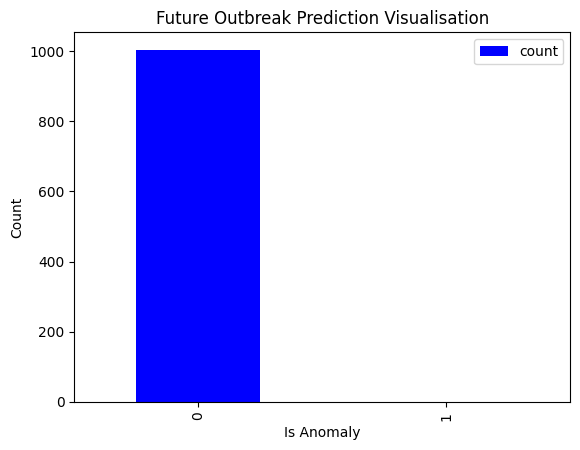

In [14]:
pandas_df = future_data.toPandas()

anomaly_counts = pandas_df['Is_Anomaly'].value_counts()

is_anomaly_df = pd.DataFrame({'Is_Anomaly': [0, 1]})

is_anomaly_df = is_anomaly_df.merge(anomaly_counts, how='left', left_on='Is_Anomaly', right_index=True)

is_anomaly_df.fillna(0, inplace=True)

is_anomaly_df.plot(kind='bar', x='Is_Anomaly', color='blue')

plt.title('Future Outbreak Prediction Visualisation')
plt.xlabel('Is Anomaly')
plt.ylabel('Count')

plt.show()
